<a href="https://colab.research.google.com/github/Youngstg/RUBELA/blob/main/Rubella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()
print("Autentikasi berhasil!")

Autentikasi berhasil!


In [ ]:
project_id = "just-fire-456815-h8"  # Ganti dengan ID proyek GCP Anda

In [ ]:
query = """
SELECT
  cdc_reports.epi_week AS cdc_reports_epi_week,
  cdc_reports.state AS cdc_reports_state,
  COALESCE(SUM(SAFE_CAST(cdc_reports.cases AS FLOAT64)), 0) AS cdc_reports_total_cases
FROM
  `lookerdata.cdc.project_tycho_reports` AS cdc_reports
WHERE
  (cdc_reports.disease = 'RUBELLA')
  AND (FLOOR(cdc_reports.epi_week / 100) = 1970 OR FLOOR(cdc_reports.epi_week / 100) = 1971)
  AND (cdc_reports.state = 'IN' OR cdc_reports.state = 'WA')
GROUP BY
  cdc_reports.epi_week, cdc_reports.state
ORDER BY
  cdc_reports.epi_week ASC;
"""

In [ ]:
# Jalankan query dan simpan hasilnya sebagai DataFrame
query_job = client.query(query)
result = query_job.result()
df = result.to_dataframe()

# Tampilkan data
print("Data Rubella:")
df.head()

Data Rubella:


,cdc_reports_epi_week,cdc_reports_state,cdc_reports_total_cases
0,197001,IN,12.0
1,197001,WA,26.0
2,197002,IN,42.0
3,197002,WA,66.0
4,197003,IN,24.0


In [ ]:
# Tampilkan 5 baris pertama dari DataFrame
print("Data Rubella:")
print(df.head())

# Informasi tentang DataFrame (tipe data, jumlah null, dll.)
print("\nInformasi DataFrame:")
print(df.info())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(df.describe())

Data Rubella:
   cdc_reports_epi_week cdc_reports_state  cdc_reports_total_cases
0                197001                IN                     12.0
1                197001                WA                     26.0
2                197002                IN                     42.0
3                197002                WA                     66.0
4                197003                IN                     24.0

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cdc_reports_epi_week     205 non-null    Int64  
 1   cdc_reports_state        205 non-null    object 
 2   cdc_reports_total_cases  205 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 5.1+ KB
None

Statistik Deskriptif:
       cdc_reports_epi_week  cdc_reports_total_cases
count                 205.0               205

In [ ]:
# Pisahkan data untuk Indiana dan Washington
df_IN = df[df['cdc_reports_state'] == 'IN'].sort_values(by='cdc_reports_epi_week')
df_WA = df[df['cdc_reports_state'] == 'WA'].sort_values(by='cdc_reports_epi_week')

# Tampilkan data untuk masing-masing negara bagian
print("Data Indiana:")
print(df_IN.head())

print("\nData Washington:")
print(df_WA.head())

Data Indiana:
   cdc_reports_epi_week cdc_reports_state  cdc_reports_total_cases
0                197001                IN                     12.0
2                197002                IN                     42.0
4                197003                IN                     24.0
6                197004                IN                     42.0
8                197005                IN                      0.0

Data Washington:
   cdc_reports_epi_week cdc_reports_state  cdc_reports_total_cases
1                197001                WA                     26.0
3                197002                WA                     66.0
5                197003                WA                    107.0
7                197004                WA                    100.0
9                197005                WA                    134.0


In [ ]:
import numpy as np

# Penyesuaian waktu untuk Indiana
realweek_IN = np.empty([len(df_IN['cdc_reports_epi_week'])])
realweek_IN[:] = df_IN['cdc_reports_epi_week'] - 197000
realweek_IN[51:] = realweek_IN[51:] - 48  # Penyesuaian untuk tahun 1971

# Penyesuaian waktu untuk Washington
realweek_WA = np.empty([len(df_WA['cdc_reports_epi_week'])])
realweek_WA[:] = df_WA['cdc_reports_epi_week'] - 197000
realweek_WA[51:] = realweek_WA[51:] - 48  # Penyesuaian untuk tahun 1971

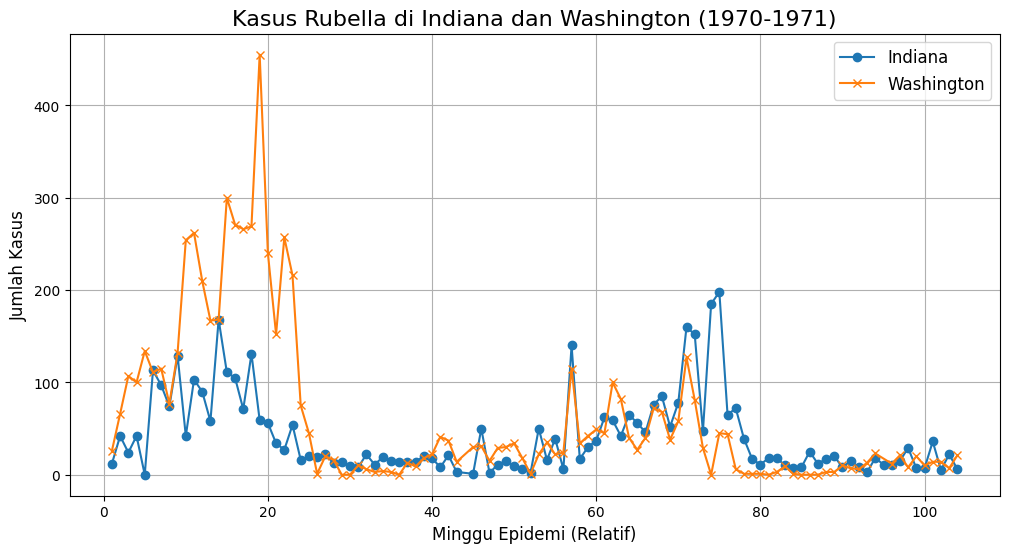

In [ ]:
import matplotlib.pyplot as plt

# Buat grafik
plt.figure(figsize=(12, 6))
plt.plot(realweek_IN, df_IN['cdc_reports_total_cases'], label='Indiana', marker='o')
plt.plot(realweek_WA, df_WA['cdc_reports_total_cases'], label='Washington', marker='x')

# Konfigurasi grafik
plt.title('Kasus Rubella di Indiana dan Washington (1970-1971)', fontsize=16)
plt.xlabel('Minggu Epidemi (Relatif)', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Tampilkan grafik
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0726
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0425
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0290
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0261
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0421
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0371
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249
Epoch 10/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0376
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


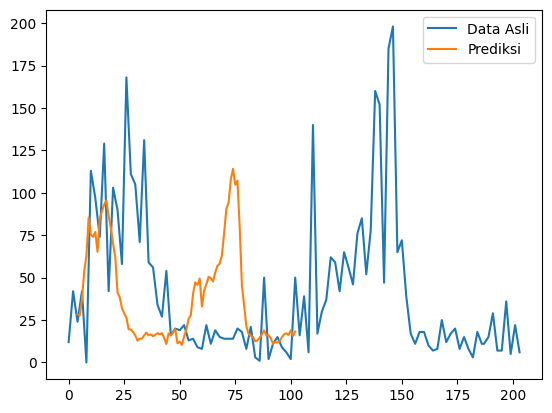

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Persiapkan data time series untuk Indiana
data_IN = df_IN['cdc_reports_total_cases'].values.reshape(-1, 1)

# Normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_IN)

# Buat dataset untuk LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 4  # Jumlah minggu sebelumnya yang digunakan untuk prediksi
X, y = create_dataset(scaled_data, look_back)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile dan latih model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=1, epochs=10)

# Prediksi
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Plot hasil
plt.plot(df_IN['cdc_reports_total_cases'], label='Data Asli')
plt.plot(range(look_back, len(predictions) + look_back), predictions, label='Prediksi')
plt.legend()
plt.show()

In [ ]:
# Hitung total kasus per negara bagian
summary_by_state = df.groupby('cdc_reports_state')['cdc_reports_total_cases'].sum().reset_index()

# Tampilkan tabel
print("Total Kasus Rubella per Negara Bagian:")
print(summary_by_state)

Total Kasus Rubella per Negara Bagian:
  cdc_reports_state  cdc_reports_total_cases
0                IN                   4276.0
1                WA                   6333.0


In [ ]:
# Ekstrak tahun dari kolom epi_week
df['year'] = df['cdc_reports_epi_week'].apply(lambda x: int(x / 100))

# Hitung total kasus per tahun
summary_by_year = df.groupby('year')['cdc_reports_total_cases'].sum().reset_index()

# Tampilkan tabel
print("Total Kasus Rubella per Tahun:")
print(summary_by_year)

Total Kasus Rubella per Tahun:
   year  cdc_reports_total_cases
0  1970                   6918.0
1  1971                   3691.0


In [ ]:
# Urutkan data berdasarkan minggu epidemi
weekly_cases = df[['cdc_reports_epi_week', 'cdc_reports_state', 'cdc_reports_total_cases']].sort_values(by='cdc_reports_epi_week')

# Tampilkan tabel
print("Jumlah Kasus Rubella per Minggu Epidemi:")
print(weekly_cases)

Jumlah Kasus Rubella per Minggu Epidemi:
     cdc_reports_epi_week cdc_reports_state  cdc_reports_total_cases
0                  197001                IN                     12.0
1                  197001                WA                     26.0
2                  197002                IN                     42.0
3                  197002                WA                     66.0
4                  197003                IN                     24.0
..                    ...               ...                      ...
200                197150                WA                     14.0
201                197151                IN                     22.0
202                197151                WA                      7.0
203                197152                IN                      6.0
204                197152                WA                     21.0

[205 rows x 3 columns]


In [ ]:
# Hitung total kasus per tahun
total_1970 = df[df['year'] == 1970]['cdc_reports_total_cases'].sum()
total_1971 = df[df['year'] == 1971]['cdc_reports_total_cases'].sum()

# Hitung persentase penurunan
percentage_decrease = ((total_1970 - total_1971) / total_1970) * 100

# Buat tabel ringkasan
summary_table = pd.DataFrame({
    'Tahun': [1970, 1971],
    'Total Kasus': [total_1970, total_1971],
    'Persentase Penurunan (%)': [None, round(percentage_decrease, 2)]
})

# Tampilkan tabel
print("Ringkasan Penurunan Kasus Rubella:")
print(summary_table)

Ringkasan Penurunan Kasus Rubella:
   Tahun  Total Kasus  Persentase Penurunan (%)
0   1970       6918.0                       NaN
1   1971       3691.0                     46.65


In [ ]:
# Hitung rata-rata kasus per minggu per negara bagian
average_cases_per_week = df.groupby('cdc_reports_state')['cdc_reports_total_cases'].mean().reset_index()

# Tampilkan tabel
print("Rata-Rata Kasus Rubella per Minggu per Negara Bagian:")
print(average_cases_per_week)

Rata-Rata Kasus Rubella per Minggu per Negara Bagian:
  cdc_reports_state  cdc_reports_total_cases
0                IN                41.514563
1                WA                62.088235
